# Tarea 01 Vision de Computadora



## Importar paquetes

In [2]:
# Antes debemos de decirle al intérprete que paquetes necesitamos

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ..., 
 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ..., 
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
Esta imagen es de tipo: uint8 con dimensiones: (1200, 1316, 4)


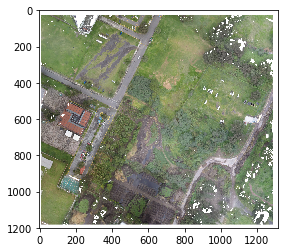

In [137]:
# Leer la imagen
image = mpimg.imread('escomT.tif')

print(image)

# Desplegar información y graficar la imagen
#print('Esta imagen es de tipo:', type(image), 'con dimensiones:', image.shape)
print('Esta imagen es de tipo:', image.dtype, 'con dimensiones:', image.shape)
plt.imshow(image)  


In [138]:
# Obtener los tres canales de la imagen
b,g,r,x = cv2.split(image)

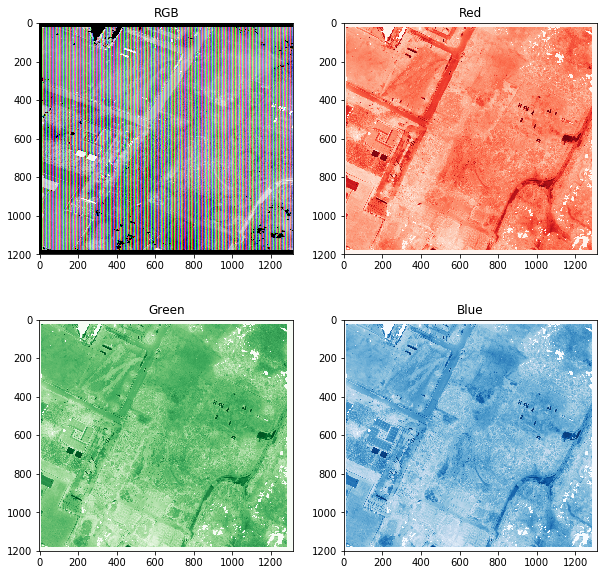

In [139]:
# Mostrar los canales
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='Reds')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='Greens')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='Blues')
plt.title('Blue')
plt.show()

In [140]:
#Es importante notar cual es el rango que tienen los valores de gris. Como ejemplo desplegaremos el canal rojo.

print(r) #canal rojo

print('\n El valor máximo en la imagen es:')
print(np.amax(r))
print('\n y valor minimo es:')
print(np.amin(r))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]

 El valor máximo en la imagen es:
255

 y valor minimo es:
0


Como puedes observar los valores son número enteros que tienen como máximo el 255. Asi que la imagen final deberá de estar en ese rango para ser visualizada.

NDI se calcula:

$$
  NDI = \frac{G - R}{G + R}
 $$

Nota, en el artículo de Meyer[1] la división está al revés, al parecer es un error del artículo.

C:\Users\AstridC\Anaconda3\envs\vision_env\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\AstridC\Anaconda3\envs\vision_env\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


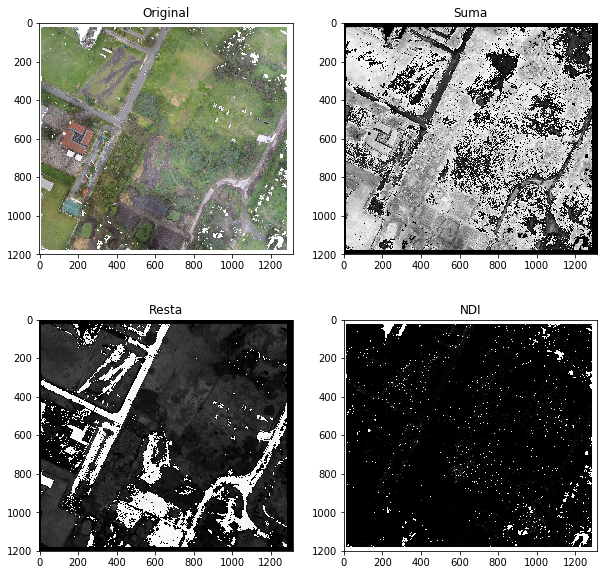

In [141]:
# TODO: Insertar el código para calcular el índice NDI

# Debes de tomar en cuenta que debes permanecer en el rango adecuado. Una función útil es cv2.addWeighted().
# La suma y la resta se pueden trabajar en enteros, sin embargo, la división es preferible mantenerla en flotante
# puedes usar la función imagen.astype('float32') para convertir a flotante
#------------------------------------------------------------------------

#alfa = 0.5 
#suma = alfa * g + (1-alfa) * r 
#resta = alfa * g - (1-alfa) * r 

resta=g-r
suma=g+r

NDI = resta/suma

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(suma, cmap='gray')
plt.title('Suma')

plt.subplot(2,2,3)
plt.imshow(resta, cmap='gray')
plt.title('Resta')

plt.subplot(2,2,4)
plt.imshow(NDI, cmap='gray')
plt.title('NDI')
plt.show()




In [143]:
print('\n El valor máximo en la imagen es:')
print(np.amax(NDI))
print('\n y valor minimo es:')
print(np.amin(NDI))
print('\n ****************************')
# Obtener los valores minimos y maximos de los tres canales de la imagen
print('\n El valor máximo en la suma es:')
print(np.amax(suma))
print('\n y valor minimo es:')
print(np.amin(suma))
print('\n ****************************')
print('\n El valor máximo en la resta es:')
print(np.amax(resta))
print('\n y valor minimo es:')
print(np.amin(resta))
print('\n ****************************')



 El valor máximo en la imagen es:
nan

 y valor minimo es:
nan

 ****************************

 El valor máximo en la suma es:
255

 y valor minimo es:
0

 ****************************

 El valor máximo en la resta es:
255

 y valor minimo es:
0

 ****************************


Como podras ver el índice no es muy claro, esto se debe a la división la cual no es lineal. Asi que haremos un umbralizado, por ahora no es importante como se hace el umbralizado, solo es importante que observes el cambio visual y encuentres una correspondencia entre las áreas verdes y las áreas resaltadas despúes del umbralizado.

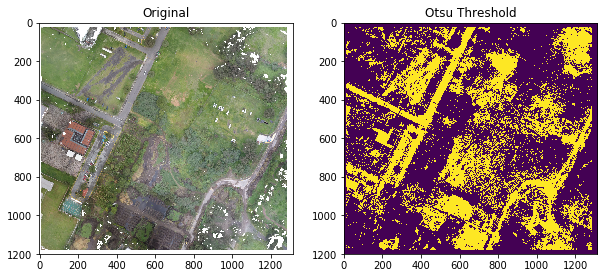

In [156]:
# Para visualizar el índice umbralizaremos la imagen
# Puedes probar diversos valores del umbral si lo deseas

umbral =0.3

# Thresholding
#NDI = NDI.astype(np.uint8)
NDI = NDI.astype('float32')
ret2,th1 =  cv2.threshold(NDI, umbral, 255.0, cv2.THRESH_BINARY)
#ret2,th1 =  cv2.threshold(image, umbral, 255.0, cv2.THRESH_BINARY)
# Comparación
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(th1)
plt.title('Otsu Threshold')

In [106]:
ExG=(2*g)-r-b

In [107]:
ExR=(1.4*r)-b

In [115]:
F=ExG-ExR
umbral =100
# Thresholding
F = F.astype(np.uint8)
ExG= ExG.astype(np.uint8)
ret,th2 = cv2.threshold(ExG,0,255.0, v.THRESH_BINARY+cv.THRESH_OTSU)
# Comparación
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(th2)
plt.title('Otsu Threshold')

NameError: name 'v' is not defined